# Lab Assignment 3

## Lorenzo Stigliano, S1725018

## Task 1
**(a)** My implementation of the `interpolate` and `show_interpolation` functions 

In [1]:
def interpolate(pts):
    xs = [pt[0] for pt in pts]
    ys = [pt[1] for pt in pts]
    V = matrix.vandermonde(xs)
    a = V.solve_right(vector(ys))
    var("x")
    P = add([a[i]*x^i for i in [0..(len(pts)-1)]])
    return (P)

In [2]:
def show_interpolation(pts):
    P = interpolate(pts)
    return plot(P, (x, pts[0][0]-2, pts[-1][0]+2)) + list_plot(pts)

**(b)** List comprhesnion to produce `quintic_points` in the form: (k,k^5) for 1 <= k <= 4. Using the interpolation techinique we will get a polynomial of n-1 degree. In this case we get a polynominal of degree 3 due to the fact that we have 4 points and so this results in the polynominal (65x^3 - 300x^2 + 476*x - 240) which is calulated when using the `interpolate` function. This is the result we expected to get.

In [3]:
quintic_points = [(k,k^5) for k in range(1,5)]
quintic_points

[(1, 1), (2, 32), (3, 243), (4, 1024)]

In [4]:
interpolate(quintic_points)

65*x^3 - 300*x^2 + 476*x - 240

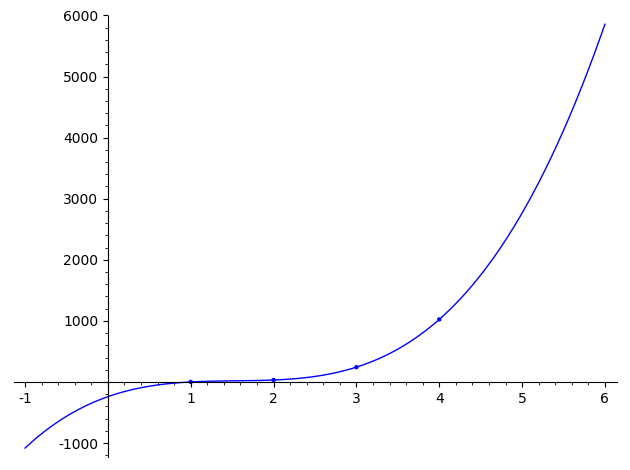

In [5]:
show_interpolation(quintic_points)

**(c)** When we replace the ranges of k by (1,4) by (1,6) we now have 6 points instead of 4 and so `interpolate` function will approximate the function by a polynominal of degree 5. Since all the points are in the form of (k,k^5) this means they all come from the same function, in particular y = x^5. By the Unisolvence Theorem 
"Given a set of n + 1 data points (xi, yi) where no two xi are the same, one is looking for a polynomial p of degree at most n with the property P(xi) = yi, i = 0,1..,n. The unisolvence theorem states that such a polynomial p exists and is unique" And as a result this unique polynominal is exactlty y = x^5.

In [6]:
quintic_points_extened = [(k,k^5) for k in range(1,7)]
quintic_points_extened

[(1, 1), (2, 32), (3, 243), (4, 1024), (5, 3125), (6, 7776)]

In [7]:
interpolate(quintic_points_extened)

x^5

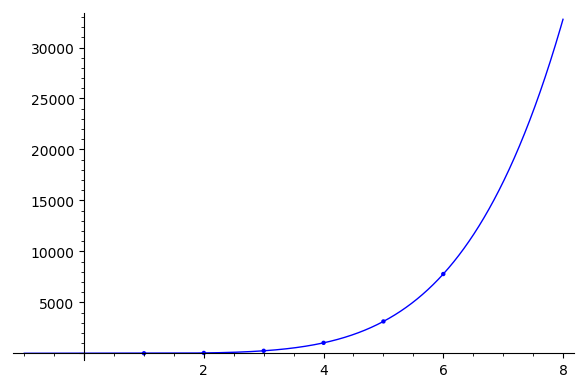

In [8]:
show_interpolation(quintic_points_extened)

## Task 2

**(a)** In Lab 3 we created the `ourdet2` function, which takes into account zeros in order to make the function more efficient.

In [9]:
def ourdet2(A):
    m, n = A.nrows(), A.ncols()
    if m<>n:
        return("Error: matrix must be square")
    elif n == 1:
        return(A[0,0])
    else:
        det = 0
        for j in range(n):
            if A[0,j] == 0:
                det = det + 0
            else:
                det = det + (-1)^j * A[0, j] * ourdet2(A[1:,[i for i in [0..n-1] if i != j]])
        return(det)

**(b)** Here, we have first created a `time` function which takes in a function and a matrix and then times the function. It is used to measure the time that ourdet2 takes to calculate the determinant for different matricies.

In [10]:
def time(fun,mat):
    import time
    start_time = time.time() 
    fun(mat)
    return time.time() - start_time

In [11]:
#n values used for the first density (1)
ns_density_1 = range(1,9)
#n values used for the second density (.4)
ns_density_2 = range(1,13)

# creating the random matricies for the appropriate density
matrices_1 = [random_matrix(ZZ, n, n,density = 1) for n in ns_density_1]
matrices_2 = [random_matrix(ZZ, n, n,density = 0.4) for n in ns_density_2]

# timing our ourdet2 function for each of the matricies in the above 2 lists
# and calulcating the time taken to measure the determinant for each matrix individually
# using list comprehensions
ourdet2_times_density1 = [time(ourdet2,m) for m in matrices_1]
ourdet2_times_density2 = [time(ourdet2,m) for m in matrices_2]

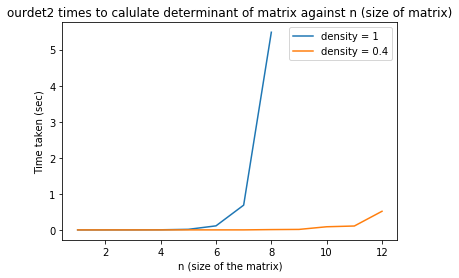

In [12]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)

ax.plot(ns_density_1,ourdet2_times_density1,label="density = 1")
ax.plot(ns_density_2,ourdet2_times_density2,label="density = 0.4")

ax.legend()

plt.title('ourdet2 times to calulate determinant of matrix against n (size of matrix)')
plt.ylabel("Time taken (sec)")
plt.xlabel('n (size of the matrix)')

plt.show()